<a href="https://colab.research.google.com/github/FabriceBeaumont/MachineLearning/blob/main/GraphTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory and Practice of Graphtheory

## Set Up: Datastructures

In [ ]:
import numpy as np
# For sparse adjacency matrices.
from scipy.sparse import csr_array
from typing import Dict, Set, List, Tuple, Any

In [ ]:
!pip install grakel
!pip install ogb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=0c29d7a74398d598b5c37d0e3cc8a69012cb2ff55bc15fe3f7a57efb2e0bc603
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils


In [ ]:
# GraKel # https://ysig.github.io/GraKeL/0.1a8/documentation.html
from grakel.datasets import fetch_dataset, get_dataset_info

# OGB # Installation: https://ogb.stanford.edu/docs/home/
from ogb.graphproppred import GraphPropPredDataset

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
dataset_name = "MUTAG"

In [ ]:
grakel_dataset = fetch_dataset(dataset_name, verbose=False)
graphs  = np.array(grakel_dataset.data)
classes = np.array(grakel_dataset.target)

In [ ]:
class MyGraph():
    def __init__(self, edge_set: Set[Tuple[int, int]], edge_weights: Dict[Tuple[int, int], float] = None, vertex_labels: Dict[int, int] = None, edge_labels: Dict[Tuple[int, int], int] = None, graph_class: Any = None):
        self.e_set: Set[Tuple[int, int]]                = edge_set
        self.e_weights: Dict[Tuple[int, int], float]    = edge_weights
        self.v_labels: Dict[int, int]                   = vertex_labels
        self.e_labels: Dict[Tuple[int, int], int]       = edge_labels
        self.g_class: Any = graph_class

    def get_edge_set(self) -> Set[int]:
        return self.e_set

    def get_edge_weights(self) -> Dict[Tuple[int, int], float]:
        return self.e_weights

    def get_edge_labels(self) -> Dict[Tuple[int, int], int]:
        return self.e_labels

    def get_vertex_labels(self) -> Dict[int, int]:
        return self.v_labels

    def get_vertex_list(self) -> List[int]:
        return list(self.v_labels.keys())

    def get_nr_vertices(self) -> int:
        return len(self.v_labels.keys())

    def get_nr_edges(self) -> int:
        return len(self.e_labels.keys())

    def get_adj_mat(self):
        min_vertex_id: int = min(self.v_labels.keys())
        m: int = self.get_nr_edges()
        
        row  = np.array(list(zip(*self.e_set))[0])
        col  = np.array(list(zip(*self.e_set))[1])
        data = np.ones(m)

        if self.e_weights is not None:
            for i, r in enumerate(row):                
                w = self.e_weights.get((r, col[i]))
                assert w != None, f"Weight of not existing edge e=({r}, {col[i]}) found!"
                data[i] = w

        return csr_array((data, (row, col)), shape=(m, m))

    def set_edges_weights(self, edge_weights: Dict[Tuple[int, int], float]) -> None:
        self.e_weights = edge_weights

    def set_edge_weight(self, v0: int, v1: int, w: float) -> None:
        assert (v0, v1) in self.e_set, f"Tried to set weight of not existing edge e=({v0}, {v1})!"
        self.e_weights[v0, v1] = w
    
    def set_random_edge_weights(self, min: float = 0.1, max: float = 100.0) -> None:
        self.e_weights = dict(zip(self.e_set, np.random.uniform(min, max, self.get_nr_edges())))

    def get_uniform_edge_weights(self, w: float = 1.0) -> None:
        return dict(zip(self.e_set, w * np.ones(self.get_nr_edges())))

    def set_uniform_edge_weights(self, w: float = 1.0) -> None:
        self.e_weights = self.get_uniform_edge_weights(w)

    def get_networkx_graph(self):
        vertex_list = self.get_vertex_list()
        edge_list   = list(self.e_set)
        edge_weights = self.get_edge_weights()
        if edge_weights is None:
            edge_weights = self.get_uniform_edge_weights()

        networkx_graph = nx.Graph()
        nodes = vertex_list

        networkx_graph.add_nodes_from(nodes)
        networkx_graph.add_edges_from(edge_list)
        attrs = {}
        for e in edge_list:
            attrs[e] = dict(zip(['weight'], [edge_weights[e]]))

        nx.set_edge_attributes(networkx_graph, attrs)
        return networkx_graph

In [ ]:
def grakel_to_mygraph(graph, graph_class) -> np.array:
    graph = graphs[0]    
    edge_set: Set[Tuple[int, int]]          = graph[0]
    vertex_labels: Dict[int, int]           = graph[1]
    edge_labels: Dict[Tuple[int, int], int] = graph[2]

    G = MyGraph(edge_set = edge_set, vertex_labels = vertex_labels, edge_labels = edge_labels, graph_class = graph_class)
    return G

In [ ]:
graph_id = 0
g: MyGraph = grakel_to_mygraph(graphs[graph_id], classes[graph_id])

In [ ]:
print(g.get_adj_mat().toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


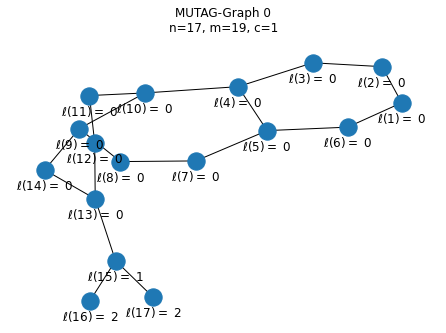

In [ ]:
figure = plt.figure()

# Plot the graph and its legend.
networkx_graph = g.get_networkx_graph()
v_list      = g.get_vertex_list()
v_labels    = g.get_vertex_labels()
vertex_annotation_strings = [f"\n\n$\ell(${v}$)=$ {v_labels[v]}" for v in v_list]
plot_annotation_dictionary = dict(zip(v_list, vertex_annotation_strings))

nx.draw(networkx_graph, labels=plot_annotation_dictionary, with_labels=True)

# Construction of the title
title_str  = f"{dataset_name}-Graph {graph_id}"
title_str += f"\nn={g.get_nr_vertices()}, m={int(g.get_nr_edges() / 2)}, c={classes[graph_id]}"
plt.title(title_str)
plt.show()

In [ ]:
# TODO: How to mark a path in G

## Algorithms on Digraphs

### Dijkstras Algorithm